# 5. Radianção Solar: Direta, Difusa e Global

Material baseado nas funções do ``pvlib`` módulo ``irradiance.py``.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
    
# built in python modules
import datetime

# python add-ons
import numpy as np
import pandas as pd

import pvlib

## Índice

1. [Radiação Global](#Radiação-Global)
2. [Modelos de céu claro](#Modelos-de-céu-claro)
2. [Diffuse ground](#Diffuse-ground)
2. [Diffuse sky](#Diffuse-sky)
    1. [Isotropic](#Isotropic-model)
    2. [Klucher](#Klucher-model)
    2. [Reindl](#Reindl-model)
    2. [Hay-Davies](#Hay-Davies-model)
    2. [Perez (retirado)](#Perez-model)
2. [Angle of incidence](#Angle-of-incidence-functions)
2. [total_irrad](#total_irrad)

# Radiação Global

A incidência total da radiação solar sobre um corpo localizado no solo é a soma das componentes: direta, difusa e refletida. Radiação direta ou Irradiação Normal Direta (DNI, sigla em inglês) é aquela proveniente diretamente do sol, sem sofrer nenhuma mudança de direção, além da provocada pela refração atmosférica. Já a radiação difusa é aquela espalhada na atmosfera para fora do feixe direto por moléculas de ar, aerossóis e nuvens. A radiação refletida depende das características do solo e da inclinação do equipamento captador. A soma das radiações direta, difusa e da radiação refletida do solo que chega na superfície é chamado de radiação solar total ou global (NREL, 2015), conforme se vê na figura abaixo.

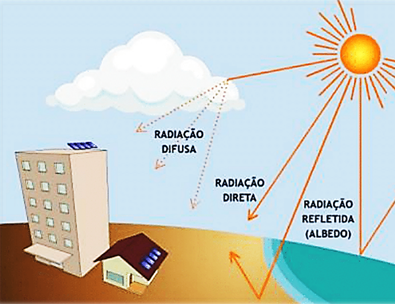






Diversas causas, como espalhamento e absorção, causam um enfraquecimento do espectro AM 0 do espaço. No somatório do espectro AM 1.5, recebemos apenas 835 $W/m^2$. Assim, dos 1.367 $W/m^2$ originalmente disponíveis, a Terra recebe apenas 61% como radiação direta. No entanto, devido à dispersão da luz na atmosfera, existe ainda a radiação difusa e a refletida pelo solo (albedo).

Formalmente temos algumas definições e simbologias de acordo com a NBR 10899 (ABNT, 2013): 

*   Irradiação solar ($H$) - integrada durante um dia, medida em watt hora por metro quadrado ($Wh/m^2$). Quando integrada durante o período de uma hora é simbolizada por "I".  
*   Irradiação direta ($H_{DIR}$) - irradiância direta integrada durante um dia;
*	Irradiação difusa ($H_{DIF}$) - irradiância difusa integrada durante um dia;  
*	Irradiação global ($H_{HOR}$) - irradiância global integrada durante um dia;  
*	Irradiação total ($H_{TOT}$) - irradiância total integrada durante um dia.  

Além dessas, é admitido que a irradiância direta, $G_{DIR,N}$, é a densidade de fluxo de energia da radiação solar de raios normais a uma superfície plana. Já a radiação direta horizontal, $G_{DIR,H}$, difere por ser no plano horizontal.

A contribuição da irradiância direta e difusa na irradiância global depende bastante das condições climáticas, principalmente das nuvens. Veja alguns exemplos:

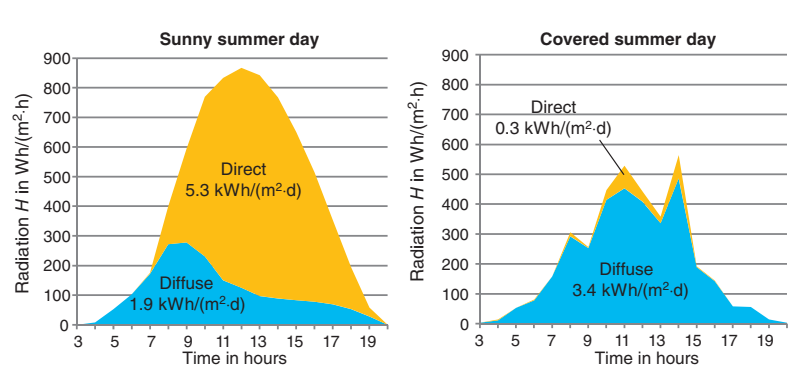

## Modelos de céu claro

O modelo mais simples seria estudar o céu sem nuvens. Explore mais exemplos de modelagem de céu claro disponível no PVLib:

http://pvlib-python.readthedocs.io/en/latest/clearsky.html

In [2]:
try:
  import pvlib
except ImportError:
  !pip install pvlib
  import pvlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

O comando `get_clearsky()` faz o trabalho de calcular a posição solar, a irradiância extraterrestre, a massa de ar e a pressão atmosférica, conforme apropriado, deixando o usuário especificar apenas os parâmetros mais importantes: tempo e atenuação atmosférica.

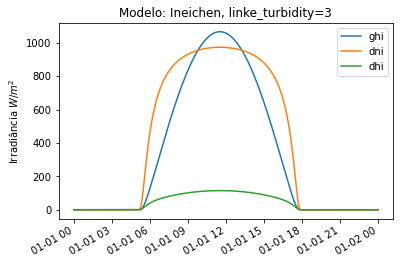

In [4]:
aju = pvlib.location.Location(-10.9095, -37.0748, 'America/Bahia', 0, 'Aracaju')
times = pd.date_range(start='2020-01-01', end='2020-01-02', freq='1min', tz=aju.tz)
ephem_data = aju.get_solarposition(times)
irrad_data = aju.get_clearsky(times, model='ineichen', linke_turbidity=3)
irrad_data.plot()
plt.ylabel('Irradiância $W/m^2$')
plt.title('Modelo: Ineichen, linke_turbidity=3');

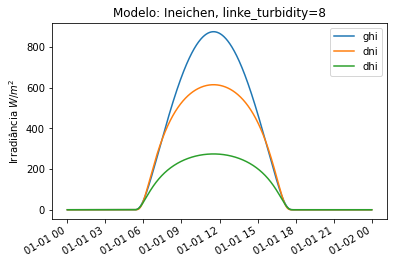

In [5]:
ephem_data = aju.get_solarposition(times)
irrad_data = aju.get_clearsky(times, model='ineichen', linke_turbidity=8)
irrad_data.plot()
plt.ylabel('Irradiância $W/m^2$')
plt.title('Modelo: Ineichen, linke_turbidity=8');

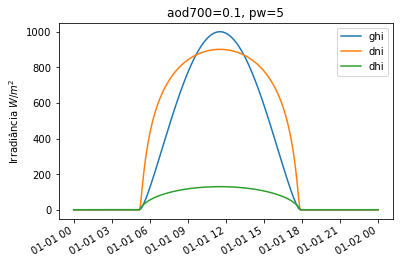

In [6]:
ephem_data = aju.get_solarposition(times)
irrad_data = aju.get_clearsky(times, model='simplified_solis', aod700=0.1, precipitable_water=5)
irrad_data.plot()
plt.ylabel('Irradiância $W/m^2$')
plt.title('aod700=0.1, pw=5');

## Explorando a influência da precipitação e da AOD

AOD, cigla em inglês para Aerossol Optical Depth, reflete a profundidade óptica do aerossol (concentração).

In [7]:
import os

import itertools

import matplotlib.pyplot as plt

import pandas as pd

import pvlib

from pvlib import clearsky, atmosphere, solarposition

from pvlib.location import Location

from pvlib.iotools import read_tmy3

aod700 = np.linspace(0, 0.5, 101)

precipitable_water = np.linspace(0, 10, 101)

apparent_elevation = 70

pressure = 101325

dni_extra = 1364

aod700, precipitable_water = np.meshgrid(aod700, precipitable_water)

# inputs are arrays, so solis is an OrderedDict

solis = clearsky.simplified_solis(apparent_elevation, aod700, precipitable_water, pressure, dni_extra)

n = 15

vmin = None

vmax = None

def plot_solis(key):

    irrad = solis[key]

    fig, ax = plt.subplots()

    im = ax.contour(aod700, precipitable_water, irrad[:, :], n, vmin=vmin, vmax=vmax)

    imf = ax.contourf(aod700, precipitable_water, irrad[:, :], n, vmin=vmin, vmax=vmax)

    ax.set_xlabel('AOD')

    ax.set_ylabel('Precipitação (cm)')

    ax.clabel(im, colors='k', fmt='%.0f')

    fig.colorbar(imf, label='{} (W/m**2)'.format(key))

    ax.set_title('{}, elevação={}'.format(key, apparent_elevation))


### Plotando

global horizontal irradiance


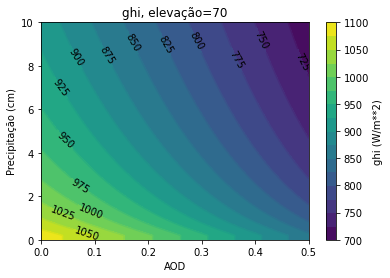

In [8]:
print("global horizontal irradiance")
plot_solis('ghi')

direct normal irradiance


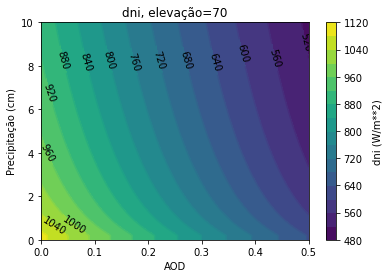

In [9]:
print("direct normal irradiance")
plot_solis('dni')

direct horizontal irradiance


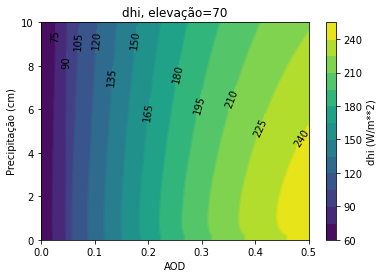

In [10]:

print("direct horizontal irradiance")
plot_solis('dhi')

## Irradiância difusa do solo

A função ``grounddiffuse`` tem algumas formas de se calcular a irradiância difusa em função da inclinação da superfície no solo e da irradiância global GHI.

Primeiro você deve especificar o albedo do solo, que é o coeficiente de reflexão de uma superfície.

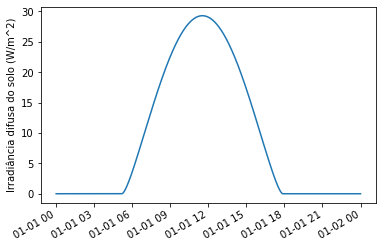

In [11]:
ground_irrad = pvlib.irradiance.get_ground_diffuse(40, irrad_data['ghi'], albedo=.25)
ground_irrad.plot()
plt.ylabel('Irradiância difusa do solo (W/m^2)');

Alternativamente, você pode especificar de que é constituído a superfície escolhendo entre: ``'concrete'`` ou ``'snow'``. Todas opções possíveis estão mostradas no gráfico abaixo.

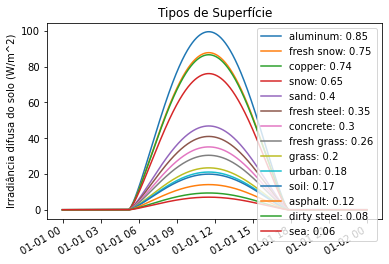

In [12]:
for surface, albedo in sorted(pvlib.irradiance.SURFACE_ALBEDOS.items(), key=lambda x: x[1], reverse=True):
    ground_irrad = pvlib.irradiance.get_ground_diffuse(40, irrad_data['ghi'], surface_type=surface)
    ground_irrad.plot(label='{}: {}'.format(surface, albedo))

plt.legend()
plt.ylabel('Irradiância difusa do solo (W/m^2)')
plt.title('Tipos de Superfície');

Pode-se ainda variar a inclinação (`tilt`). O máximo ocorre com 90º e o mínimo, em 0º.

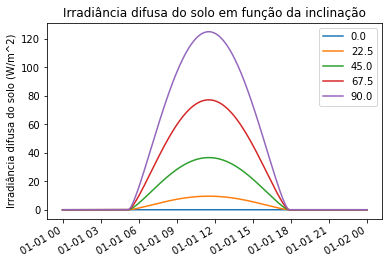

In [13]:
for surf_tilt in np.linspace(0, 90, 5):
    ground_irrad = pvlib.irradiance.get_ground_diffuse(surf_tilt, irrad_data['ghi'])
    ground_irrad.plot(label=surf_tilt)

plt.legend()
plt.ylabel('Irradiância difusa do solo (W/m^2)')
plt.title('Irradiância difusa do solo em função da inclinação');

### Irradiância difusa do Céu (Nuvens)

``pvlib`` possui diferentes formas de se calcular a componente da irradiância difusa do céu, sendo eles: 

1. [Isotropic](#Isotropic-model)
2. [Klucher](#Klucher-model)
2. [Reindl](#Reindl-model)
2. [Hay-Davies](#Hay-Davies-model)
2. [Perez](#Perez-model)

### Modelo `Isotropic`

O modelo ``isotropic`` é o mais simples.

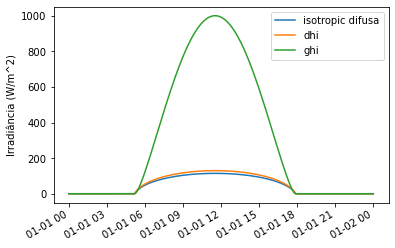

In [14]:
sky_diffuse = pvlib.irradiance.isotropic(40, irrad_data['dhi'])
sky_diffuse.plot(label='isotropic difusa')
irrad_data['dhi'].plot()
irrad_data['ghi'].plot()
plt.legend()
plt.ylabel('Irradiância (W/m^2)');

Compare a difusa do céu no plano POA (Plane of Array) com a entrada DHI. 

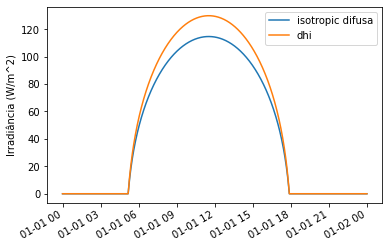

In [15]:
sky_diffuse = pvlib.irradiance.isotropic(40, irrad_data['dhi'])
sky_diffuse.plot(label='isotropic difusa')
irrad_data['dhi'].plot()
plt.legend()
plt.ylabel('Irradiância (W/m^2)');

### Klucher model

(0.0, 1100.0)

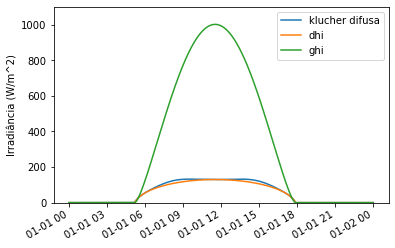

In [16]:
surf_tilt = 10
surf_az = 0

sky_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, irrad_data['dhi'], irrad_data['ghi'], 
                                       ephem_data['apparent_zenith'], ephem_data['azimuth'])
sky_diffuse.plot(label='klucher difusa')
irrad_data['dhi'].plot()
irrad_data['ghi'].plot()
plt.legend()
plt.ylabel('Irradiância (W/m^2)');
plt.ylim(0,1100)

(0.0, 200.0)

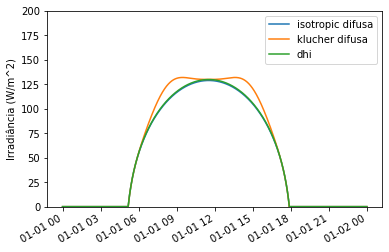

In [17]:
surf_tilt = 10
surf_az = 0 # north facing

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic difusa')

klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, irrad_data['dhi'], irrad_data['ghi'], 
                                        ephem_data['apparent_zenith'], ephem_data['azimuth'])
klucher_diffuse.plot(label='klucher difusa')

irrad_data['dhi'].plot()

plt.legend()
plt.ylabel('Irradiância (W/m^2)');
plt.ylim(0,200)

Klucher como uma função do azimute.

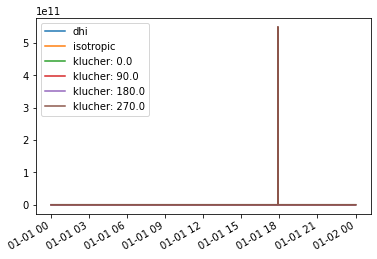

In [18]:
surf_tilt = 40

irrad_data['dhi'].plot()

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic')

for surf_az in np.linspace(0, 270, 4):
    klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, irrad_data['dhi'], irrad_data['ghi'], 
                                            ephem_data['apparent_zenith'], ephem_data['azimuth'])
    klucher_diffuse.plot(label='klucher: {}'.format(surf_az))

plt.legend();

O azimute não deve influenciar se a inclinação for 0 (horizontal).

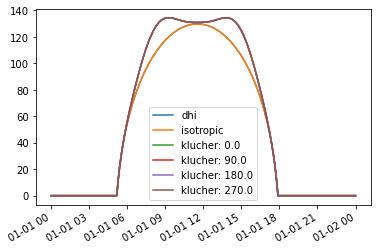

In [19]:
surf_tilt = 0

irrad_data['dhi'].plot()

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic')

for surf_az in np.linspace(0, 270, 4):
    klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, irrad_data['dhi'], irrad_data['ghi'], 
                                                ephem_data['apparent_zenith'], ephem_data['azimuth'])
    klucher_diffuse.plot(label='klucher: {}'.format(surf_az))

plt.legend();

### Reindl model

Apontando para o norte.

(0.0, 150.0)

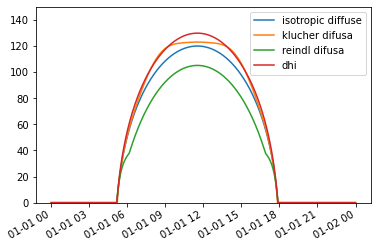

In [20]:
surf_tilt = 32
surf_az = 0 # face norte

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic diffuse')

klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, 
                                            irrad_data['dhi'], irrad_data['ghi'], 
                                            ephem_data['apparent_zenith'], ephem_data['azimuth'])
klucher_diffuse.plot(label='klucher difusa')

dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)
reindl_diffuse = pvlib.irradiance.reindl(surf_tilt, surf_az, 
                                          irrad_data['dhi'], irrad_data['dni'], irrad_data['ghi'], dni_et,
                                          ephem_data['apparent_zenith'], ephem_data['azimuth'])
reindl_diffuse.plot(label='reindl difusa')

irrad_data['dhi'].plot()

plt.legend();
plt.ylim(0,150)

Face Leste

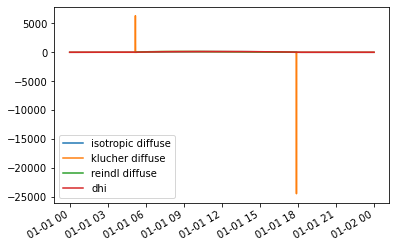

In [21]:
surf_tilt = 32
surf_az = 90 

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic diffuse')

klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, 
                                            irrad_data['dhi'], irrad_data['ghi'], 
                                            ephem_data['apparent_zenith'], ephem_data['azimuth'])
klucher_diffuse.plot(label='klucher diffuse')

dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)
reindl_diffuse = pvlib.irradiance.reindl(surf_tilt, surf_az, 
                                          irrad_data['dhi'], irrad_data['dni'], irrad_data['ghi'], dni_et,
                                          ephem_data['apparent_zenith'], ephem_data['azimuth'])
reindl_diffuse.plot(label='reindl diffuse')

irrad_data['dhi'].plot()

plt.legend();

### Hay-Davies model

Hay-Davies face sul.

(0.0, 150.0)

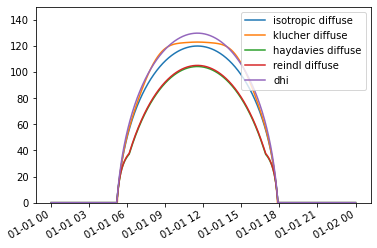

In [22]:
surf_tilt = 32
surf_az = 0 

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic diffuse')

klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, 
                                            irrad_data['dhi'], irrad_data['ghi'], 
                                            ephem_data['apparent_zenith'], ephem_data['azimuth'])
klucher_diffuse.plot(label='klucher diffuse')

dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)

haydavies_diffuse = pvlib.irradiance.haydavies(surf_tilt, surf_az, 
                                                irrad_data['dhi'], irrad_data['dni'], dni_et,
                                                ephem_data['apparent_zenith'], ephem_data['azimuth'])
haydavies_diffuse.plot(label='haydavies diffuse')

reindl_diffuse = pvlib.irradiance.reindl(surf_tilt, surf_az, 
                                          irrad_data['dhi'], irrad_data['dni'], irrad_data['ghi'], dni_et,
                                          ephem_data['apparent_zenith'], ephem_data['azimuth'])
reindl_diffuse.plot(label='reindl diffuse')

irrad_data['dhi'].plot()

plt.legend();
plt.ylim(0,150)

Facing leste.

(0.0, 150.0)

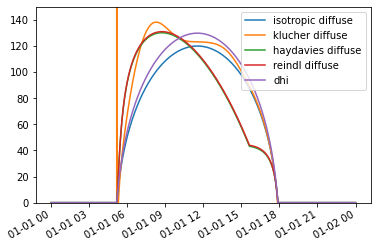

In [23]:
surf_tilt = 32
surf_az = 90 

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic diffuse')

klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, 
                                            irrad_data['dhi'], irrad_data['ghi'], 
                                            ephem_data['apparent_zenith'], ephem_data['azimuth'])
klucher_diffuse.plot(label='klucher diffuse')

dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)

haydavies_diffuse = pvlib.irradiance.haydavies(surf_tilt, surf_az, 
                                                irrad_data['dhi'], irrad_data['dni'], dni_et,
                                                ephem_data['apparent_zenith'], ephem_data['azimuth'])
haydavies_diffuse.plot(label='haydavies diffuse')

reindl_diffuse = pvlib.irradiance.reindl(surf_tilt, surf_az, 
                                          irrad_data['dhi'], irrad_data['dni'], irrad_data['ghi'], dni_et,
                                          ephem_data['apparent_zenith'], ephem_data['azimuth'])
reindl_diffuse.plot(label='reindl diffuse')

irrad_data['dhi'].plot()

plt.legend();
plt.ylim(0,150)

Hay-Davies parece muito similar a Reindl!

### King model

(0.0, 200.0)

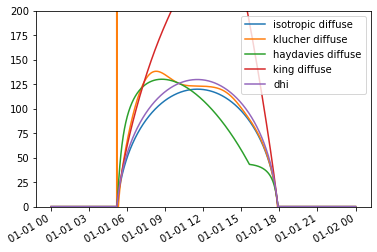

In [24]:
surf_tilt = 32
surf_az = 90 

iso_diffuse = pvlib.irradiance.isotropic(surf_tilt, irrad_data['dhi'])
iso_diffuse.plot(label='isotropic diffuse')

klucher_diffuse = pvlib.irradiance.klucher(surf_tilt, surf_az, 
                                            irrad_data['dhi'], irrad_data['ghi'], 
                                            ephem_data['apparent_zenith'], ephem_data['azimuth'])
klucher_diffuse.plot(label='klucher diffuse')

dni_et = pvlib.irradiance.get_extra_radiation(times.dayofyear)

haydavies_diffuse = pvlib.irradiance.haydavies(surf_tilt, surf_az, 
                                                irrad_data['dhi'], irrad_data['dni'], dni_et,
                                                ephem_data['apparent_zenith'], ephem_data['azimuth'])
haydavies_diffuse.plot(label='haydavies diffuse')

king_diffuse = pvlib.irradiance.king(surf_tilt,irrad_data['dhi'], irrad_data['ghi'], ephem_data['azimuth'])
king_diffuse.plot(label='king diffuse')

irrad_data['dhi'].plot()

plt.legend();
plt.ylim(0,200)

## Funções para o ângulo de incidência

O módulo ``irradiance`` possui algumas funções para esse cálculo, sendo eles:

Primeiro o aoi (angle of incidence):

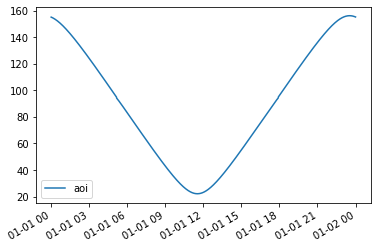

In [25]:
inclinação = 10
azimute = 0
proj = pvlib.irradiance.aoi(inclinação, azimute, ephem_data['apparent_zenith'], ephem_data['azimuth'])
proj.plot()

#plt.ylim(-1.1,1.1)
plt.legend();
#plt.ylim(0,180)

AOI projection: the dot production of the surface normal and the vector to the sun.

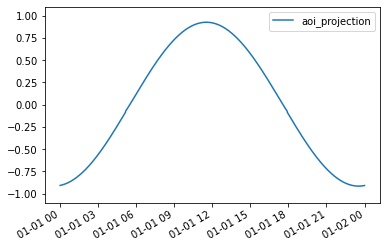

In [26]:
proj = pvlib.irradiance.aoi_projection(inclinação, azimute, ephem_data['apparent_zenith'], ephem_data['azimuth'])
proj.plot()

plt.ylim(-1.1,1.1)
plt.legend();

A razão entre a projeção no ângulo dos módulos (POA) e a horizontal.

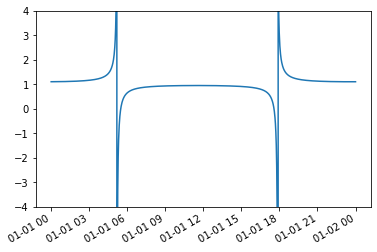

In [27]:
ratio = pvlib.irradiance.poa_horizontal_ratio(inclinação, azimute, ephem_data['apparent_zenith'], ephem_data['azimuth'])
ratio.plot()
plt.ylim(-4,4);

Este gráfico mostra o que o ``aoi_projection`` faz, calculando o produto ponto a ponto.

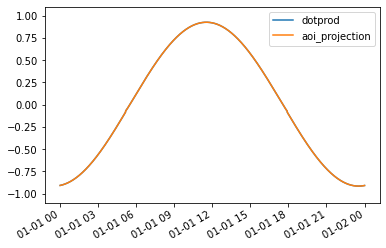

In [28]:
surf_tilt = inclinação
surf_az = azimute

sen_alt_rad = np.radians(90 - surf_tilt)
sen_azi_rad = np.radians(surf_az)

alts = np.radians(90 - ephem_data['apparent_zenith'])
azis = np.radians(ephem_data['azimuth'])

dotprod = np.cos(sen_alt_rad)*np.cos(alts)*np.cos(sen_azi_rad-azis) + np.sin(sen_alt_rad)*np.sin(alts)
dotprod.plot(label='dotprod')

proj = pvlib.irradiance.aoi_projection(surf_tilt, surf_az, ephem_data['apparent_zenith'], ephem_data['azimuth'])
proj.plot()

plt.ylim(-1.1,1.1)
plt.legend();

### Criando uma função para comparar os modelos

Pode ser interessante calcular uma função, como a ``get_total_irradiance``, que faz ficar mais fácil a comparação entre os diferentes modelos.

In [29]:
def get_total_irradiance_per_model(surface_tilt, surface_azimuth):
    models = ['isotropic', 'klucher', 'haydavies', 'reindl', 'king', 'perez']
    totals = {}

    for model in models:
        total = pvlib.irradiance.get_total_irradiance(
            surface_tilt, surface_azimuth,
            ephem_data['apparent_zenith'], ephem_data['azimuth'],
            dni=irrad_data['dni'], ghi=irrad_data['ghi'], dhi=irrad_data['dhi'],
            dni_extra=dni_et, airmass=AM,
            model=model,
            surface_type='urban')
        totals[model] = total
        total.plot()
        plt.title(model)
        plt.ylim(-50, 1100)
        plt.ylabel('Irradiance (W/m^2)')

    plt.figure()
    for model, total in totals.items():
        total['poa_global'].plot(lw=.5, label=model)

    plt.legend()
    plt.ylabel('Irradiance (W/m^2)')

Usando a função para calular para o Norte e inclinado igual a latitude:

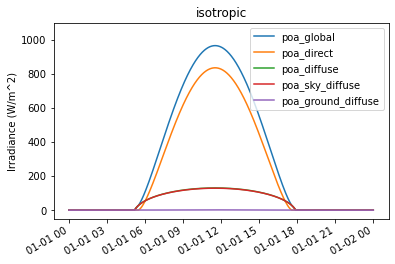

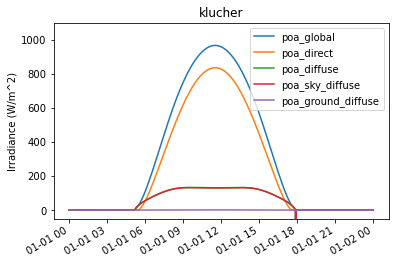

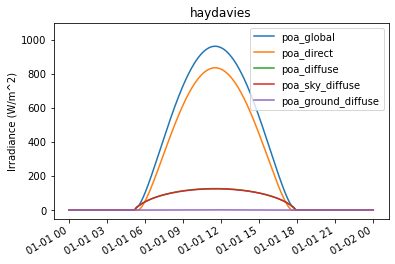

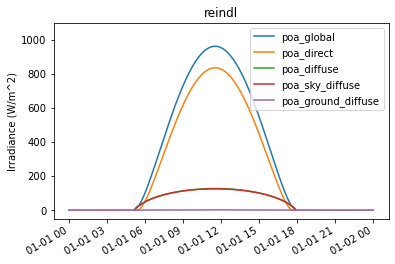

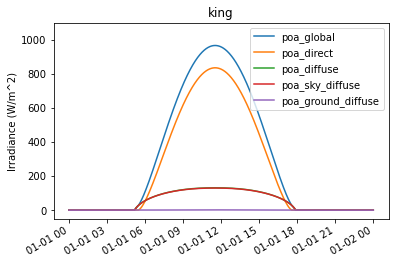

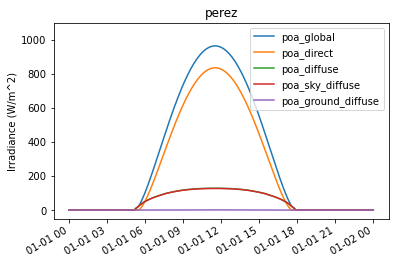

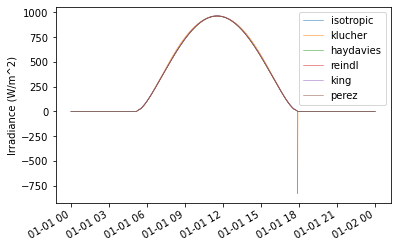

In [30]:
sun_zen = ephem_data['apparent_zenith']
AM = pvlib.atmosphere.get_relative_airmass(sun_zen, model='kastenyoung1989')
get_total_irradiance_per_model(10, 0)

tilt = 0

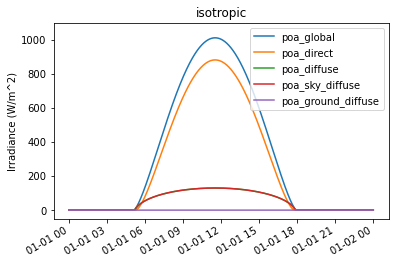

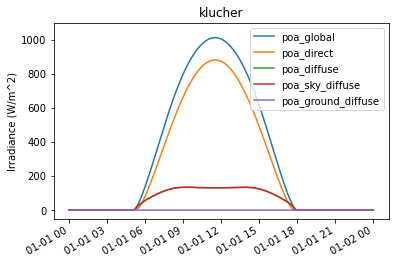

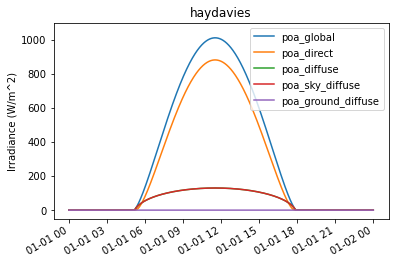

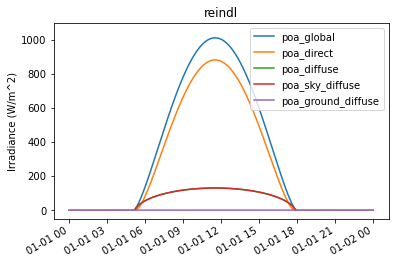

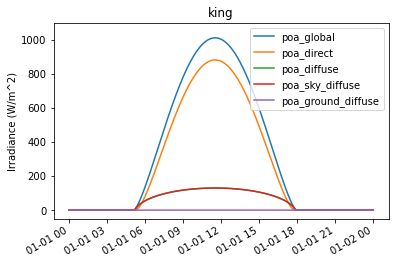

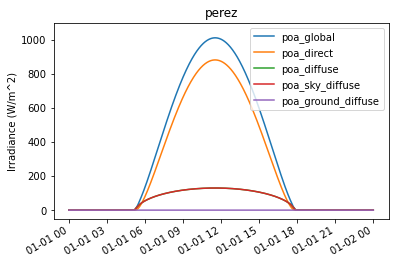

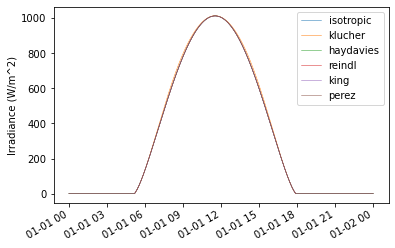

In [31]:
get_total_irradiance_per_model(0, 0)

Face Leste e inclinado igual a latitude.

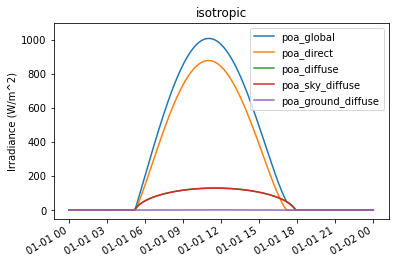

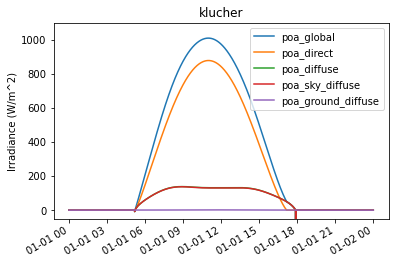

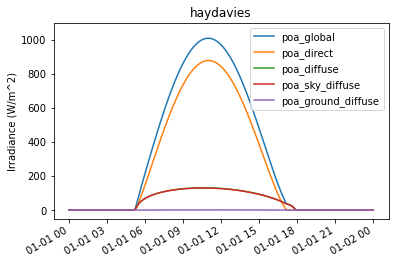

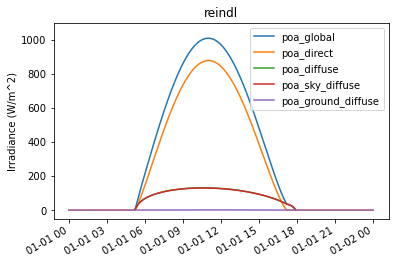

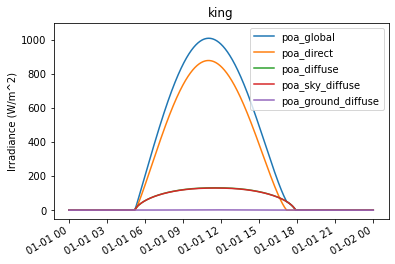

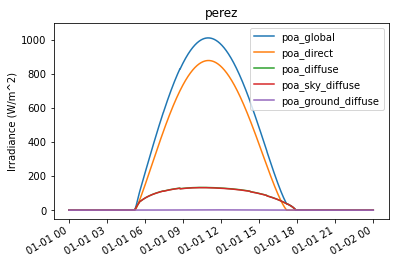

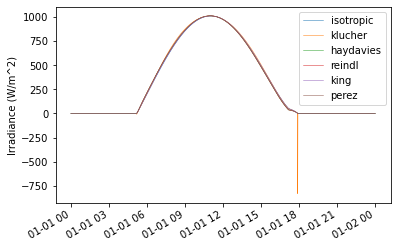

In [32]:
get_total_irradiance_per_model(10, 90)

# Tarefa

1. Escolha uma estação automática do INMET mais próxima de onde você está agora, veja em: https://mapas.inmet.gov.br/
2. Escolha tabela e pegue os dados medidos durante a última semana de Radiação Solar (kJ/m²), divida por 3600 s (pois os dados são integrados por hora) e converta para a irradiância solar (W/m2) - https://tempo.inmet.gov.br/TabelaEstacoes/A409.
3. Calcule para o mesmo local e hora, os valores de irradiância de céu claro na horizontal que é como foi medido na estação solarimétrica.
4. Calcule uma espécie de transmitância fazendo a razão entre o que foi medido em solo de irradiância global na horizontal (2) e o que chegaria no solo/horizontal caso o ceu estivesse claro e sem nuvens (calculado em 3).

# Desafio

1. Calcule o valor da irradiância extraterrestre (pvlib.irradiance.get_extra_radiation) calculada para os mesmos dias;
2. Corrija (através do cosseno) o ângulo de incidência para o plano horizontal (pvlib.irradiance.aoi);
3. Calcule a transmitância efetiva da atmosfera que é a razão entre a irradiância medida e o valor antes de entrar na atmosfera (extraterreste).

Obs: Observe que os modelos físicos usados para estimar a irradiância solar utilizam normalmente dois valores de irradiância, um de céu claro ($\tau_{clear}$) e outro nublado ($\tau_{cloud}$). Depois se estima qual a cobertura efetiva de nuvens. Por curiosidade, veja em: https://repositorio.ufsc.br/bitstream/handle/123456789/77621/110674.pdf?sequence=1&isAllowed=y